# Network growth models pt 2


In [1]:
# Load some packages
import numpy as np
import matplotlib.pyplot as plt
import random 
from random import choices
import operator
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import powerlaw
from scipy.optimize import curve_fit
from scipy.stats import poisson, binom, powerlaw,ks_2samp
import scipy.stats as stats

import import_ipynb

In [2]:
from FunzioniVarie import trianngles,degree,truncated_power_law

importing Jupyter notebook from FunzioniVarie.ipynb


## Random growth model

Growing an Erd˝os R´enyi random network requires an initially unconnected graph with N nodes, and then at each time step an edge between two nodes appears with probability p. In the graph showed below, 200 nodes are gradually connected with probability p = 0.1.

In [3]:
def rand_net(n=200,p=0.1,seed = 184937):
    if seed is not None:
        np.random.seed(seed)
        
    # generate the nodes positions in [0,1)x[0,1)
    x = np.random.rand(n) # random array, elements in [0,1), length n
    y = np.random.rand(n) # same....
    z = np.random.rand(n)

    # connectivity should be such that all vertices are connected
    # print(conn)

    list2=[]
    
    nodes_random=np.arange(0,n)
    random.shuffle(nodes_random)

    while len(list2) < n:
        for j in nodes_random:
            if np.random.rand() < p:
                list2.append(j)
    #print(list1)
    #print(list2)

    fig = plt.figure(figsize=(10,8))
    ax = Axes3D(fig)
            
    for j,k,l,i in zip(x,y,z,range(len(x))):
        ax.text(j,k,l,i)
            
    for i in range(n):
        ax.plot([x[i],x[list2[i]]], [y[i],y[list2[i]]], [z[i],z[list2[i]]])
    ax.scatter(x, y, z, cmap='hsv')

    plt.pause(0.001) # needed to force pyplot to actually show us
        
    deg, triangles, cl_triangles, avdist=trianngles(n,list2,x,y,z)
    
    fig = plt.figure(figsize=(10,8))


    sns.countplot(deg)
    plt.show()

 
    
    index, value = max(enumerate(deg), key=operator.itemgetter(1))

    print("Node with highest degree is:", index,"with a degree of:", value,", the mean is", np.sum(deg)/len(deg),", the variance is", np.var(deg))
    
    return deg

### TRIAL 1

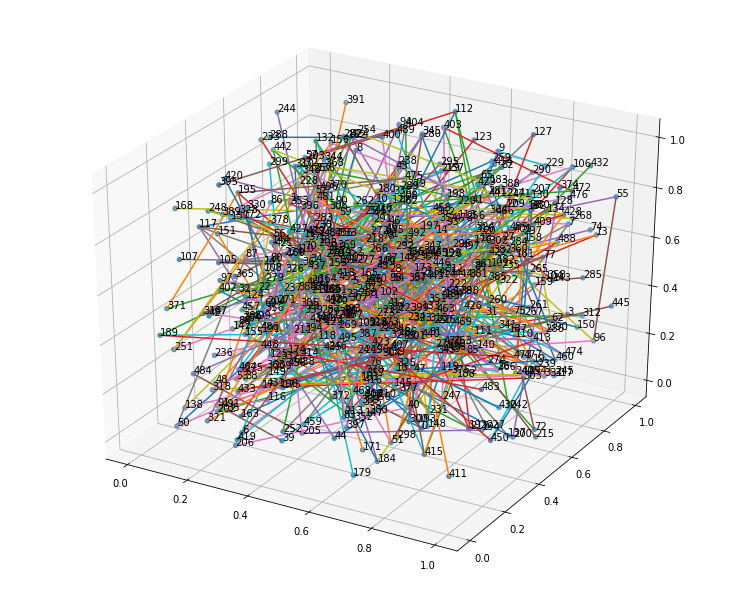

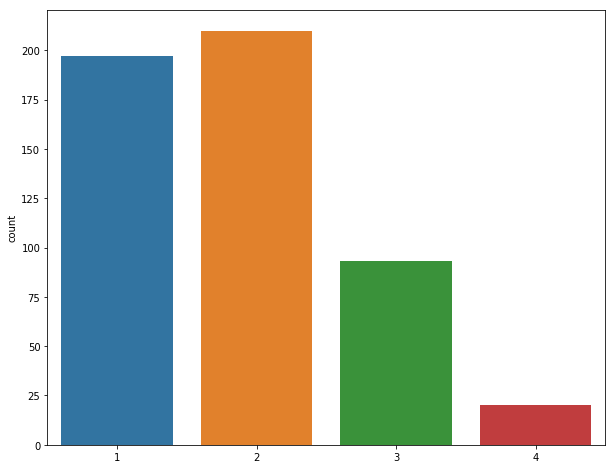

Node with highest degree is: 10 with a degree of: 4 , the mean is 1.876923076923077 , the variance is 0.6963905325443788


In [4]:
deg=rand_net(n=500,p=0.1)

It is evident that there are no clusters; this is due to the fact that the growth mechanism of the network is completely random. Some of the new nodes managed to increase their degree as other new nodes were added, but younger nodes still had a lower degree. This means that even if the choice of the edges is done randomly, the ”age” of the node plays a relevant role in the development of the network. Of course, already existing nodes have higher degrees because they have more time to accumulate edges.

Looking at the histogram of the distribution of the nodes’ degrees, it looks like the degree distribution is positively skewed. This histogram is typical of a binomial or a Poisson distribution: this happens because the edges between nodes are added randomly.

In [5]:
il = poisson.rvs(mu=1, size=500)
il = il+1
ks_2samp(deg,il)

Ks_2sampResult(statistic=0.04553846153846153, pvalue=0.6561143686640343)

### TRIAL 2

Just to get the idea, let’s see how the same growing mechanism looks like if the nodes are connected with a probability p = 0.5

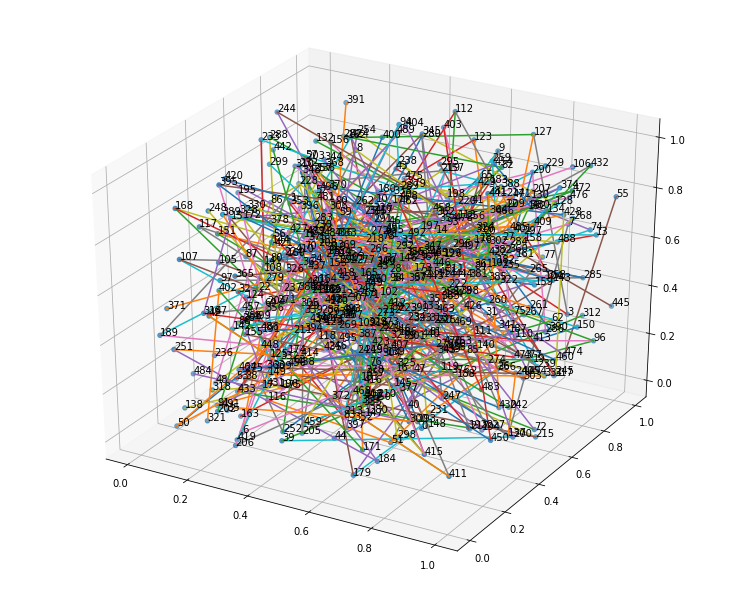

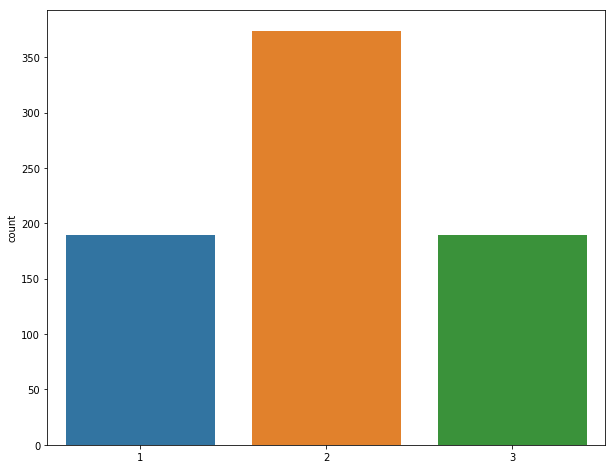

Node with highest degree is: 6 with a degree of: 3 , the mean is 2.0 , the variance is 0.5026595744680851


In [6]:
deg2= rand_net(n=500,p=0.5)

In this case the degree distribution is less skewed, the range is smaller and very few nodes have a degree of one. Still, the histogram looks like one we would expect from a Poisson distribution.

In [7]:
il2 = poisson.rvs(mu=1-0.5, size=500)
il2 = il2+1
ks_2samp(deg2,il)

Ks_2sampResult(statistic=0.13067021276595747, pvalue=6.051157473942886e-05)